<a href="https://colab.research.google.com/github/MaroSand/analisis_climatico_2025/blob/main/analisis_climatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Datos - Laboratorio Práctico

### ETL y Análisis Exploratorio: *Global Climate Change (2020–2025)*

**Autora:** Sandobal, Marisol Elizabeth

**Fecha**: 11/11/2025

**Objetivo**
Aplicar un proceso completo de Extracción, Transformación y Carga (ETL), seguido de un Análisis Exploratorio de Datos (EDA), para comprender las tendencias del cambio climático global entre 2020 y 2025.



## 1- ETL (Extracción, Transformación y Carga)

### Instalación de depencias

In [2]:
!pip install pymysql sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.3 MB/s eta 0:00:00


### Extracción (Extract)

In [3]:
# URL del dataset alojado en GitHub

url = "https://raw.githubusercontent.com/MaroSand/analisis_climatico_2025/refs/heads/main/Global_Climate_Change_Data_2020_2025.csv"

try:
    df = pd.read_csv(url)
    print("Extracción de datos exitosa.")
    display(df.head())
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

Extracción de datos exitosa.


,Year,Continent,Country,Avg_Temperature(°C),CO2_Emissions(Mt),Sea_Level_Rise(mm),Climate_Risk_Index
0,2021,Europe,UK,19.6,978.24,3.57,28
1,2022,Asia,India,25.3,770.39,1.47,74
2,2022,Asia,Japan,23.2,963.84,3.09,48
3,2020,North America,Mexico,20.8,349.49,3.81,23
4,2024,Africa,Egypt,33.1,475.82,3.35,86


Extracción de datos.

Se realiza la importación del dataset.  
El archivo se encuentra en un repositorio público de Github y contiene información sobre temperatura promedio, emisiones de CO2, nivel del mar y riesgo climático por país.


### Transformación (Transform)

Exploración inicial de los datos.

Antes de limpiar o transformar la información, se analiza la estructura y los primeros registros del dataset para conocer su contenido.


In [4]:
# Resumen de la información del Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1200 non-null   int64  
 1   Continent            1200 non-null   object 
 2   Country              1200 non-null   object 
 3   Avg_Temperature(°C)  1200 non-null   float64
 4   CO2_Emissions(Mt)    1200 non-null   float64
 5   Sea_Level_Rise(mm)   1200 non-null   float64
 6   Climate_Risk_Index   1200 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 65.8+ KB


In [5]:
# Primeras 10 filas del Dataframe
df.head(10)

,Year,Continent,Country,Avg_Temperature(°C),CO2_Emissions(Mt),Sea_Level_Rise(mm),Climate_Risk_Index
0,2021,Europe,UK,19.6,978.24,3.57,28
1,2022,Asia,India,25.3,770.39,1.47,74
2,2022,Asia,Japan,23.2,963.84,3.09,48
3,2020,North America,Mexico,20.8,349.49,3.81,23
4,2024,Africa,Egypt,33.1,475.82,3.35,86
5,2021,South America,Chile,18.9,262.92,1.18,80
6,2020,Africa,Nigeria,18.0,660.90,2.00,46
7,2021,Africa,South Africa,15.3,359.76,2.80,55
8,2022,Asia,Japan,18.4,883.98,4.46,58
9,2025,Oceania,Australia,30.8,598.40,1.37,27


In [6]:
# Generar estadísticas descriptivas de las columnas numéricas
df.describe()

,Year,Avg_Temperature(°C),CO2_Emissions(Mt),Sea_Level_Rise(mm),Climate_Risk_Index
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,2022.390833,22.416250,556.830433,3.027608,55.877500
std,1.726915,7.172001,258.394034,1.164478,20.585285
min,2020.000000,10.000000,103.320000,1.000000,20.000000
25%,2021.000000,16.375000,337.897500,1.987500,37.750000
50%,2022.000000,22.200000,559.960000,3.020000,56.000000
75%,2024.000000,28.400000,783.670000,4.090000,74.000000
max,2025.000000,35.000000,999.550000,5.000000,90.000000


In [7]:
# Ver si hay filas repetidas
df.duplicated().sum()

np.int64(0)

In [8]:
#Ver si hay valores faltantes
df.isnull().sum()

,0
Year,0
Continent,0
Country,0
Avg_Temperature(°C),0
CO2_Emissions(Mt),0
Sea_Level_Rise(mm),0
Climate_Risk_Index,0


En esta sección se realizaría la limpieza y estandarización de los datos:
- Eliminación de valores faltantes y duplicados.  
- Conversión de tipos de datos.  
- Creación de nuevas variables derivadas para análisis posterior.

In [9]:
print("Valores únicos de 'Country':")
print(sorted(df['Country'].unique()))

print("\nValores únicos de 'Continent':")
print(sorted(df['Continent'].unique()))


Valores únicos de 'Country':
['Argentina', 'Australia', 'Brazil', 'Canada', 'Chile', 'China', 'Egypt', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Kenya', 'Mexico', 'New Zealand', 'Nigeria', 'Pakistan', 'South Africa', 'Spain', 'UK', 'USA']

Valores únicos de 'Continent':
['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']


Se enlistan los países y continentes para evaluar su posterior traducción.

In [11]:
# En este dataset no se detectaron valores faltantes ni duplicados.
# Los tipos de datos ya son correctos.

# Renombrar columnas al español para mejorar legibilidad
df.rename(columns={
    'Year': 'Año',
    'Continent': 'Continente',
    'Country': 'País',
    'Avg_Temperature(°C)': 'Temp_Promedio(°C)',
    'CO2_Emissions(Mt)': 'Emisiones_CO2(Mt)',
    'Sea_Level_Rise(mm)': 'Aumento_Nivel_Mar(mm)',
    'Climate_Risk_Index': 'Índice_Riesgo_Climático'
}, inplace=True)

# Crear variable derivada, que relaciona emisiones de CO2 con temperatura media
df['CO2_por_Temperatura'] = df['Emisiones_CO2(Mt)'] / df['Temp_Promedio(°C)']

# Categorizar el índice de riesgo climático en niveles
df['Categoría_Riesgo'] = pd.cut(df['Índice_Riesgo_Climático'],
    bins=[0, 40, 60, 80, 100],
    labels=['Bajo', 'Medio', 'Alto', 'Crítico']
)

# Mostrar muestra del resultado
display(df.sample(10))

,Año,Continente,País,Temp_Promedio(°C),Emisiones_CO2(Mt),Aumento_Nivel_Mar(mm),Índice_Riesgo_Climático,CO2_por_Temperatura,Categoría_Riesgo
887,2022,Asia,India,20.0,670.78,1.37,36,33.539000,Bajo
1109,2022,North America,Canada,20.4,529.63,1.79,22,25.962255,Bajo
160,2021,Oceania,New Zealand,22.9,186.10,3.04,36,8.126638,Bajo
386,2020,North America,USA,14.8,505.41,2.80,59,34.149324,Medio
182,2021,Europe,Germany,12.7,681.79,1.77,51,53.684252,Medio
289,2021,Asia,Indonesia,12.8,957.39,4.04,44,74.796094,Medio
841,2021,Africa,Kenya,30.1,451.97,4.10,24,15.015615,Bajo
460,2022,Oceania,Australia,34.8,862.32,1.45,34,24.779310,Bajo
1116,2023,Europe,Spain,15.4,161.94,4.26,34,10.515584,Bajo
565,2020,Africa,Nigeria,34.4,587.19,4.03,64,17.069477,Alto


Se renombran las columnas del dataset al español para mejorar la comprensión del análisis y la coherencia con el contexto de presentación.

Se agregan variables derivadas que permiten observar la relación entre emisiones de CO2 y temperatura promedio, y una clasificación del riesgo climático en cuatro categorías: “Bajo”, “Medio”, “Alto” y “Crítico”.

In [14]:
# Traducir los nombres de países y continentes al español para mejorar la legibilidad y coherencia del dataset.

# Traducir nombres de países
traduccion_paises = {
    'Brazil': 'Brasil',
    'Canada': 'Canadá',
    'Egypt': 'Egipto',
    'France': 'Francia',
    'Germany': 'Alemania',
    'Italy': 'Italia',
    'Japan': 'Japón',
    'Kenya': 'Kenia',
    'Mexico': 'México',
    'New Zealand': 'Nueva Zelanda',
    'Pakistan': 'Pakistán',
    'South Africa': 'Sudáfrica',
    'Spain': 'España',
    'UK': 'Reino Unido',
    'USA': 'Estados Unidos'
}

df['País'] = df['País'].replace(traduccion_paises)

# Traducir nombres de continentes
traduccion_continentes = {
    'Africa': 'África',
    'Europe': 'Europa',
    'North America': 'América del Norte',
    'South America': 'América del Sur',
    'Oceania': 'Oceanía'
}

df['Continente'] = df['Continente'].replace(traduccion_continentes)

# Mostrar una muestra aleatoria
display(df[['País', 'Continente']].sample(10))

,País,Continente
265,Canadá,América del Norte
165,Argentina,América del Sur
503,Argentina,América del Sur
709,Pakistán,Asia
136,Indonesia,Asia
213,Sudáfrica,África
192,Nueva Zelanda,Oceanía
479,India,Asia
696,Francia,Europa
65,Kenia,África


Se traducen los nombres de los continentes y países al español con el fin de mantener coherencia idiomática en el análisis y facilitar la interpretación de los resultados.
Esta transformación mejora la legibilidad de las visualizaciones y tablas descriptivas.

### Carga (Load)

In [15]:
# Definir nombre del archivo de salida
ruta_salida = 'Datos_Climaticos_Transformados.csv'

# Guardar el dataframe final en formato CSV
df.to_csv(ruta_salida, index=False, sep=',')

print(f'Archivo CSV generado: {ruta_salida}')

Archivo CSV generado: Datos_Climaticos_Transformados.csv


Carga de datos

Los datos transformados se almacenan en una base de datos local (SQLite) para su posterior análisis.  
Esto completa el proceso ETL (Extract, Transform, Load).


## 2- EDA (Análisis Exploratorio de Datos)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset transformado desde GitHub
url = "https://raw.githubusercontent.com/MaroSand/analisis_climatico_2025/refs/heads/main/Datos_Climaticos_Transformados.csv"
df = pd.read_csv(url)

print("Dataset cargado correctamente desde GitHub.")
display(df.head())

# Verificar estructura general
print("\nInformación general del DataFrame:")
df.info()

print("\nEstadísticas descriptivas:")
display(df.describe())


Dataset cargado correctamente desde GitHub.


,Año,Continente,País,Temp_Promedio(°C),Emisiones_CO2(Mt),Aumento_Nivel_Mar(mm),Índice_Riesgo_Climático,CO2_por_Temperatura,Categoría_Riesgo
0,2021,Europa,Reino Unido,19.6,978.24,3.57,28,49.910204,Bajo
1,2022,Asia,India,25.3,770.39,1.47,74,30.450198,Alto
2,2022,Asia,Japón,23.2,963.84,3.09,48,41.544828,Medio
3,2020,América del Norte,México,20.8,349.49,3.81,23,16.802404,Bajo
4,2024,África,Egipto,33.1,475.82,3.35,86,14.375227,Crítico



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      1200 non-null   int64  
 1   Continente               1200 non-null   object 
 2   País                     1200 non-null   object 
 3   Temp_Promedio(°C)        1200 non-null   float64
 4   Emisiones_CO2(Mt)        1200 non-null   float64
 5   Aumento_Nivel_Mar(mm)    1200 non-null   float64
 6   Índice_Riesgo_Climático  1200 non-null   int64  
 7   CO2_por_Temperatura      1200 non-null   float64
 8   Categoría_Riesgo         1200 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 84.5+ KB

Estadísticas descriptivas:


,Año,Temp_Promedio(°C),Emisiones_CO2(Mt),Aumento_Nivel_Mar(mm),Índice_Riesgo_Climático,CO2_por_Temperatura
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,2022.390833,22.416250,556.830433,3.027608,55.877500,28.082998
std,1.726915,7.172001,258.394034,1.164478,20.585285,17.576406
min,2020.000000,10.000000,103.320000,1.000000,20.000000,3.204942
25%,2021.000000,16.375000,337.897500,1.987500,37.750000,14.809580
50%,2022.000000,22.200000,559.960000,3.020000,56.000000,24.768227
75%,2024.000000,28.400000,783.670000,4.090000,74.000000,36.743212
max,2025.000000,35.000000,999.550000,5.000000,90.000000,97.489216


In [17]:
# Agrupamiento por continente
agrupado_cont = df.groupby('Continente').agg({
    'Temp_Promedio(°C)': 'mean',
    'Emisiones_CO2(Mt)': 'mean',
    'Aumento_Nivel_Mar(mm)': 'mean',
    'Índice_Riesgo_Climático': 'mean',
    'CO2_por_Temperatura': 'mean'
}).round(2)

display(agrupado_cont)



,Temp_Promedio(°C),Emisiones_CO2(Mt),Aumento_Nivel_Mar(mm),Índice_Riesgo_Climático,CO2_por_Temperatura
Continente,,,,,
América del Norte,22.58,583.64,2.99,55.99,29.28
América del Sur,22.82,550.75,3.07,54.09,26.93
Asia,22.52,583.90,3.02,55.96,29.50
Europa,21.86,541.30,2.98,56.32,28.17
Oceanía,22.71,530.62,3.03,56.68,26.32
África,21.99,553.54,3.08,56.12,28.45


In [18]:
# Tendencias temporales (promedios anuales)
promedio_anual = df.groupby('Año')[['Temp_Promedio(°C)', 'Emisiones_CO2(Mt)', 'Aumento_Nivel_Mar(mm)', 'CO2_por_Temperatura']].mean().round(2)
display(promedio_anual)


,Temp_Promedio(°C),Emisiones_CO2(Mt),Aumento_Nivel_Mar(mm),CO2_por_Temperatura
Año,,,,
2020,23.38,538.54,2.92,25.64
2021,22.15,567.91,3.09,29.11
2022,21.82,585.33,2.95,29.98
2023,22.67,535.89,2.90,27.29
2024,21.97,573.38,3.12,29.34
2025,22.29,546.38,3.19,27.69


In [19]:
# Distribución de categorías de riesgo
print("Frecuencia de categorías de riesgo climático:")
display(df['Categoría_Riesgo'].value_counts())

print("\nPromedio de emisiones por categoría de riesgo:")
display(df.groupby('Categoría_Riesgo')['Emisiones_CO2(Mt)'].mean().round(2))


Frecuencia de categorías de riesgo climático:


,count
Categoría_Riesgo,
Alto,355
Bajo,340
Medio,328
Crítico,177



Promedio de emisiones por categoría de riesgo:


,Emisiones_CO2(Mt)
Categoría_Riesgo,
Alto,556.09
Bajo,556.75
Crítico,573.52
Medio,548.71


Emisión promedio de CO2 por continente (Mt):
          Continente  Emisiones_CO2(Mt)
2               Asia             583.90
0  América del Norte             583.64
5             África             553.54
1    América del Sur             550.75
3             Europa             541.30
4            Oceanía             530.62


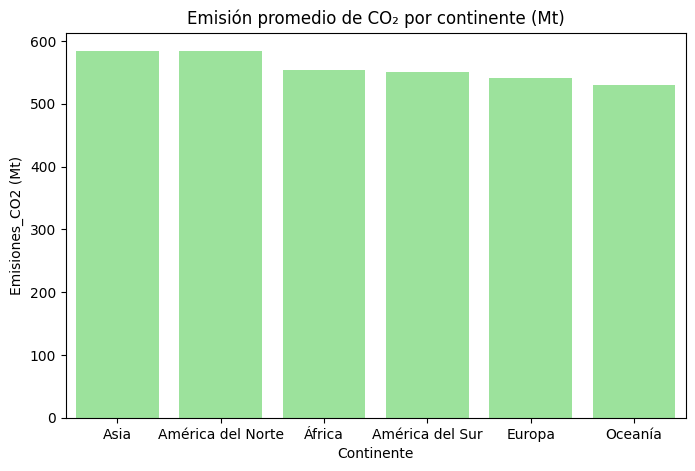

In [20]:
# ¿Qué continente tiene mayor emisión promedio por país?

emisiones_promedio = df.groupby('Continente')['Emisiones_CO2(Mt)'].mean().reset_index().round(2)
emisiones_promedio = emisiones_promedio.sort_values(by='Emisiones_CO2(Mt)', ascending=False)

print("Emisión promedio de CO2 por continente (Mt):")
print(emisiones_promedio)

# Gráfico
plt.figure(figsize=(8,5))
sns.barplot(data=emisiones_promedio, x='Continente', y='Emisiones_CO2(Mt)', color='lightgreen')
plt.title("Emisión promedio de CO₂ por continente (Mt)")
plt.ylabel("Emisiones_CO2 (Mt)")
plt.xlabel("Continente")
plt.show()

Asia y América del Norte lideran las emisiones promedio de CO2 por continente, con más de 580 Mt, mientras que Europa y Oceanía presentan los valores más bajos, alrededor de 530–540 Mt. Esto refleja la concentración de actividad industrial y energética en los continentes más poblados y desarrollados, mostrando desigualdad en la contribución al cambio climático.

Aumento promedio del nivel del mar por continente (mm):
          Continente  Aumento_Nivel_Mar(mm)
5             África                   3.08
1    América del Sur                   3.07
4            Oceanía                   3.03
2               Asia                   3.02
0  América del Norte                   2.99
3             Europa                   2.98


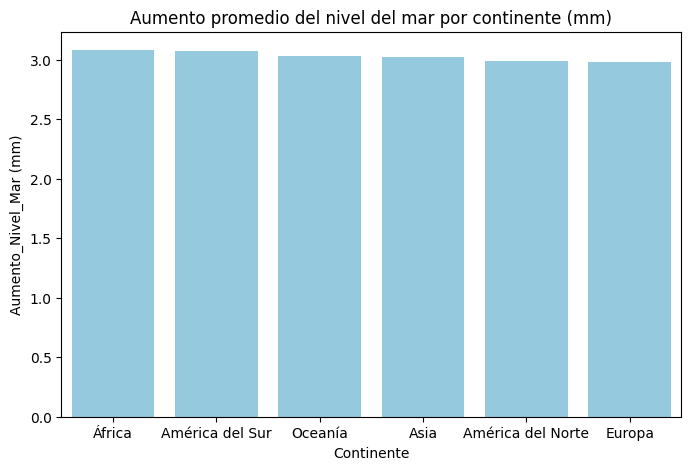

In [21]:
# Promedio del aumento del nivel del mar por continente

nivel_mar_continente = df.groupby('Continente')['Aumento_Nivel_Mar(mm)'].mean().reset_index()
nivel_mar_continente = nivel_mar_continente.sort_values(by='Aumento_Nivel_Mar(mm)', ascending=False).round(2)

print("Aumento promedio del nivel del mar por continente (mm):")
print(nivel_mar_continente)

# Gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(data=nivel_mar_continente, x='Continente', y='Aumento_Nivel_Mar(mm)', color='skyblue')
plt.title("Aumento promedio del nivel del mar por continente (mm)")
plt.ylabel("Aumento_Nivel_Mar (mm)")
plt.xlabel("Continente")
plt.show()

El aumento promedio del nivel del mar varía ligeramente entre continentes. África y América del Sur presentan los valores más altos, mientras que Europa y América del Norte muestran los más bajos. Esto indica que, aunque todos los continentes experimentan un aumento, los efectos del cambio climático sobre el nivel del mar no son uniformes y algunas regiones pueden estar más expuestas al riesgo de inundaciones costeras.


In [22]:
# ¿Los países con mayor riesgo climático también presentan mayores emisiones de CO2?

correlacion_riesgo_co2 = df[['Índice_Riesgo_Climático', 'Emisiones_CO2(Mt)']].corr().iloc[0,1]
print(f"Correlación entre riesgo climático y emisiones de CO₂: {correlacion_riesgo_co2:.3f}")

riesgo_co2 = df.groupby('País')[['Índice_Riesgo_Climático', 'Emisiones_CO2(Mt)']].mean().reset_index().round(2)
print("\nPaíses con mayor riesgo y sus emisiones asociadas:")
print(riesgo_co2.sort_values(by='Índice_Riesgo_Climático', ascending=False).head(5))

Correlación entre riesgo climático y emisiones de CO₂: 0.017

Países con mayor riesgo y sus emisiones asociadas:
         País  Índice_Riesgo_Climático  Emisiones_CO2(Mt)
13     Italia                    63.49             499.29
12  Indonesia                    60.43             585.43
0    Alemania                    59.26             555.84
19   Pakistán                    58.64             513.95
7      Egipto                    57.81             527.13


La correlación es prácticamente nula. Esto indica que el nivel de emisiones de CO2 no está directamente relacionado con el riesgo climático inmediato de un país. Es decir, un país puede emitir mucho CO2 (como EE.UU. o China) pero tener un riesgo medio, mientras que otros, como Italia o Pakistán, muestran alto riesgo sin ser los mayores emisores.

In [23]:
# ¿Los continentes con mayores emisiones promedio presentan también mayor aumento del nivel del mar?

relacion_emision_mar = df.groupby('Continente')[['Emisiones_CO2(Mt)', 'Aumento_Nivel_Mar(mm)']].mean().reset_index().round(2)
print("\nRelación entre emisiones y aumento del nivel del mar por continente:")
print(relacion_emision_mar.sort_values(by='Emisiones_CO2(Mt)', ascending=False))



Relación entre emisiones y aumento del nivel del mar por continente:
          Continente  Emisiones_CO2(Mt)  Aumento_Nivel_Mar(mm)
2               Asia             583.90                   3.02
0  América del Norte             583.64                   2.99
5             África             553.54                   3.08
1    América del Sur             550.75                   3.07
3             Europa             541.30                   2.98
4            Oceanía             530.62                   3.03


Asia y América del Norte tienen las mayores emisiones, pero África y América del Sur son los que tienen mayor aumento del nivel del mar aunque sus emisiones sean menores.
Por lo que, aunque los continentes más industrializados concentran mayores emisiones, los más afectados por el aumento del nivel del mar no son necesariamente los que más emiten, y esto evidencia desigualdades en el impacto del cambio climático.

Países con mayor relación CO2 / Temperatura
              País  CO2_por_Temperatura
11           India                32.44
14           Japón                31.77
17         Nigeria                31.02
4           Canadá                30.74
9   Estados Unidos                30.58
15           Kenia                30.48
12       Indonesia                29.47
0         Alemania                29.10
20     Reino Unido                28.85
1        Argentina                28.68


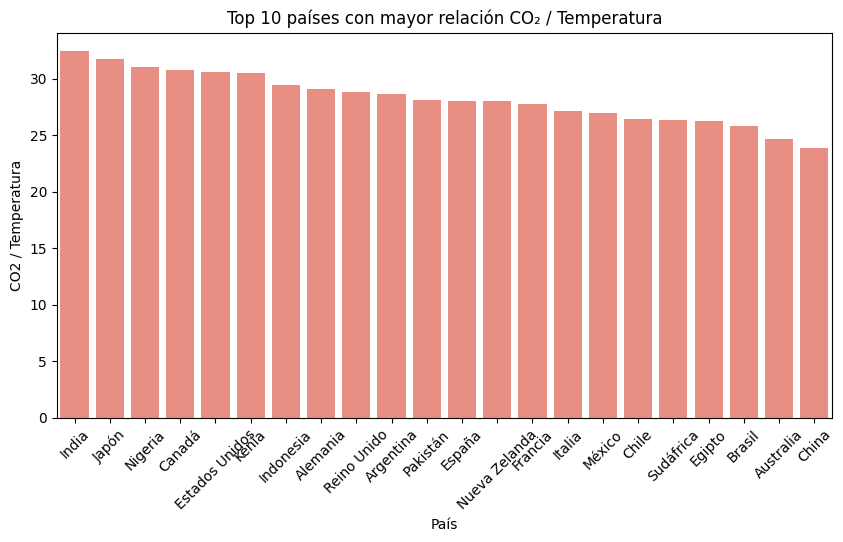

In [24]:
# ¿Qué países emiten más CO2 en proporción a su temperatura promedio?

top_emisiones = df.groupby('País')['CO2_por_Temperatura'].mean().reset_index().round(2)
top_emisiones = top_emisiones.sort_values(by='CO2_por_Temperatura', ascending=False)

print("Países con mayor relación CO2 / Temperatura")
print(top_emisiones.head(10))

# Gráfico
plt.figure(figsize=(10,5))
sns.barplot(data=top_emisiones, x='País', y='CO2_por_Temperatura', color='salmon')
plt.title("Top 10 países con mayor relación CO₂ / Temperatura")
plt.ylabel("CO2 / Temperatura")
plt.xlabel("País")
plt.xticks(rotation=45)
plt.show()


La relación CO2/temperatura permite identificar países que emiten mucho CO2 en proporción a su temperatura, lo que da otra perspectiva sobre impacto y eficiencia energética.

Top 3 países más vulnerables por año:
     Año           País  Temp_Promedio(°C)  Aumento_Nivel_Mar(mm)  \
0   2020      Indonesia              30.62                   3.34   
1   2020          Chile              24.14                   3.11   
2   2021       Alemania              24.25                   3.26   
3   2021          Japón              22.65                   3.88   
4   2021       Pakistán              24.34                   3.66   
5   2022          Kenia              23.74                   3.33   
6   2022        Nigeria              23.30                   3.13   
7   2022  Nueva Zelanda              22.65                   3.17   
8   2023          Kenia              22.84                   3.18   
9   2023          China              24.23                   3.53   
10  2023        Nigeria              24.01                   3.28   
11  2024         Brasil              22.18                   3.49   
12  2024      Indonesia              24.66                   3.22

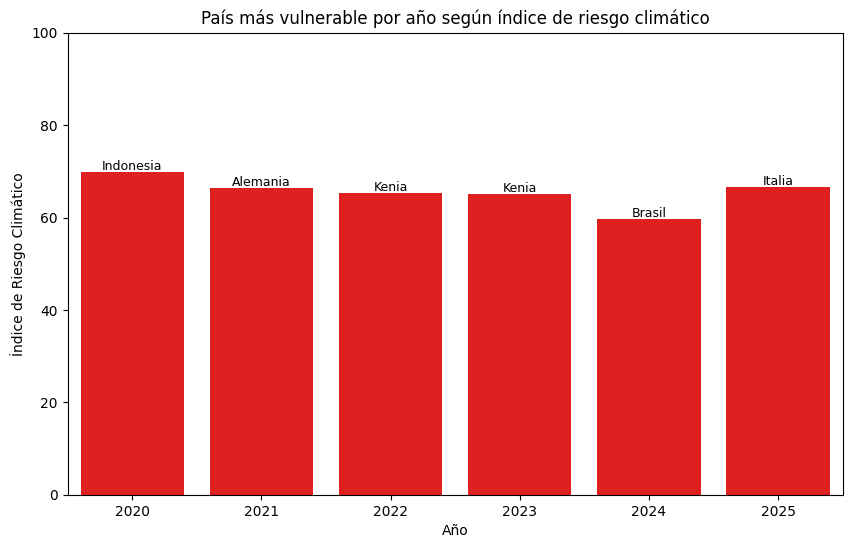

In [50]:
# Agrupar por Año y País
df_agregado = df.groupby(['Año', 'País'])[
    ['Temp_Promedio(°C)', 'Aumento_Nivel_Mar(mm)', 'Índice_Riesgo_Climático']
].mean().reset_index()

# Lista para acumular países vulnerables
paises_vulnerables = []

# Iterar año por año para evitar DeprecationWarning
for año, grupo in df_agregado.groupby('Año'):
    umbral_temp = grupo['Temp_Promedio(°C)'].mean()
    umbral_mar = grupo['Aumento_Nivel_Mar(mm)'].mean()
    umbral_riesgo = grupo['Índice_Riesgo_Climático'].mean()

    filtro = grupo[
        (grupo['Temp_Promedio(°C)'] > umbral_temp) &
        (grupo['Aumento_Nivel_Mar(mm)'] > umbral_mar) &
        (grupo['Índice_Riesgo_Climático'] > umbral_riesgo)
    ].sort_values('Índice_Riesgo_Climático', ascending=False).head(3)

    paises_vulnerables.append(filtro)

# Unir todos los años
paises_vulnerables = pd.concat(paises_vulnerables).reset_index(drop=True).round(2)

# Mostrar tabla de top 3 países por año
print("Top 3 países más vulnerables por año:")
print(paises_vulnerables)

# Seleccionar solo el país más vulnerable de cada año para el gráfico
pais_mas_vulnerable = paises_vulnerables.loc[
    paises_vulnerables.groupby('Año')['Índice_Riesgo_Climático'].idxmax()].sort_values('Año').reset_index(drop=True).round(2)

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(data=pais_mas_vulnerable, x='Año', y='Índice_Riesgo_Climático', color='red')

# Etiquetas con nombres de país
for i, row in pais_mas_vulnerable.iterrows():
    plt.text(i, row['Índice_Riesgo_Climático'] + 0.5, row['País'], ha='center', fontsize=9, color='black')

plt.title("País más vulnerable por año según índice de riesgo climático")
plt.ylabel("Índice de Riesgo Climático")
plt.xlabel("Año")
plt.ylim(0, 100)
plt.show()

Filtrando por temperatura promedio, aumento del nivel del mar e índice de riesgo climático, se identificaron los top 3 países más vulnerables cada año. Esto permite ver cómo los impactos del cambio climático no se concentran en un solo continente, sino que varían anualmente y afectan de manera recurrente a ciertos países. El análisis resalta regiones que podrían requerir medidas prioritarias de adaptación y mitigación, y facilita el seguimiento de tendencias de vulnerabilidad año a año.

CONCLUSIÓN:
El EDA revela que el cambio climático afecta de manera desigual a los países y continentes. No siempre los mayores emisores son los más vulnerables, y las variables de riesgo, temperatura y nivel del mar deben analizarse de manera conjunta para identificar las zonas críticas. Este análisis por año permite además observar tendencias temporales y priorizar regiones que requieren atención inmediata.